---
# Lecture 8: Introduction to Machine Learning in Python
---

## 1. Introduction <a id='l_overview'></a>

This lecture was created as part of a CPS Teaching Fellowship. We are introducing a novel approach to study advanced scientific programming. The goal of today's lecture is to present Machine Learning approach. We will learn about the most typical machine learning problems, such as dimensionality reduction and classification, and how to approach these using the Python programmming language. We will also consider how ML can be used in computational biophsyics using the example from lecture #7. These are the important concepts that we will cover:

- [Machine Learning](#l_ml)
- [Data sets](#l_ds)
- [Dimensionality reduction](#l_dr) 
- [Principal Component Analysis (PCA)](#l_pca)
- [Multidimensional Scaling (MDS)](#l_mds)
- [Other dimensionality reduction techniques](#l_other)
- [Classification](#l_class)


## 2. Machine Learning <a id='l_ml'></a>

Below is the outline of the field with specific algorithms:

1. **Unsupervised Learning** - there is no correct input/output pair 
    - *Clustering*
        - K-Means
        - Hierarchical
        - Spectral
    - *Dimensionality reduction*
        - Principal Components Analysis (PCA)
        - Multidimensional Scaling (MDS)
        - Stochastic Neighbour Embedding (t-SNE)
        - Uniform Manifold Approximation and Projection (UMAP)
        
        
2. **Supervised Learning** - there is a correct input/output pair
    - *Regression*
        - Curve fitting
        - Linear regression 
    - *Classification*
        - Linear Classifiers (Support Vector Machines, Logistic regression)
        - Decision Trees
        - Neural Networks
        
        
3. **Reinforcement Learning** - is an area concerned with how software agents have to take actions in an environment so as to maximize some cumulative reward



## 3. Generating of data sets

Setup:
- Suppose one has $p$ samples of N-dimensional data points, $x_i\in\mathbb{R}^N$
- Store these samples columnwise as $X\in\mathbb{R}^{p\,\times\,N}$
- We call this the original data matrix, or simply the data
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the data space (high dim)
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the latent space (low dim)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE, MDS

### Generate linear data with noise ( 2-dimensional data set):

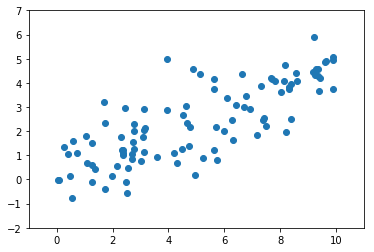

In [46]:
raw_data_x = np.random.uniform(0,10, size=(100,))
raw_data_y = 0.5 * raw_data_x + np.random.normal(0,1,len(raw_data_x))

X_2d = np.empty((100, 2))
X_2d[:,0] = raw_data_x
X_2d[:,1] = raw_data_y

#plt.figure(figsize=(12,8))
plt.scatter(X_2d[:,0], X_2d[:,1])
plt.xlim(-1, 11)
plt.ylim(-2, 7)
plt.show()

Let's look how the data looks like (first 10 points):

In [23]:
X_2d[:10]

array([[ 8.83148522,  5.40151469],
       [ 4.66857357,  2.97438139],
       [ 7.76249897,  5.74402683],
       [ 1.06237237,  0.63032347],
       [ 4.75154919,  3.19299343],
       [ 2.15087831, -1.16377865],
       [ 2.26044671, -0.20083862],
       [ 1.82249332,  0.52899036],
       [ 2.98893772,  1.18472349],
       [ 8.45207754,  6.7837327 ]])

### Load some high-dimensional data from the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. 
![](pics/mnist.png)

In [41]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### Let's take only 1000 data points

In [42]:
X = x_test[:1000]
Y = y_test[:1000]

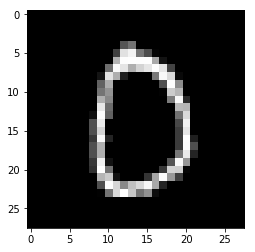

In [43]:
plt.imshow(X[567], cmap='gray')

### We want to convert each data point (picture with a handwritten digit) to a vector which dimensionality is 28x28 = 784

In [44]:
X = X.reshape(1000, 784)
X[567].shape

(784,)

**Summary** - we have two data sets:
- Two-dimensional data set with 100 points
- 768-dimensional data set with 1000 points

## 4. Dimensionality reduction <a id='l_dr'></a>
Dimensionality reduction is the process of reducing the number of dimensions under consideration by obtaining a set of principal variables. You can select a subset of original variables, or find a linear or nonlinear combination of features, or make a projection to lower dimensions. 

![](pics/dr.png)


Methods:
- **Principal Components Analysis (PCA)** - linear method to extract dimensions with the highest variance
- **Multidimensional Scaling (MDS)** - nonlinear method to project in lower dimensions by saving pairwise distances
- **Stochastic Neighbour Embedding (t-SNE)** - making an embedding in lower dimensions by conserving distribution of distances 
- **Uniform Manifold Approximation and Projection (UMAP)** - projecting the data on manifold into fewer dimensions

## 4. Principal Component Analysis <a id='l_dr'></a>

**Math**:

- PCA goal: Find orthogonal transformation $W$ of centered data $X_c$ (i.e. $Y=WX_c$) such that variance along subsequent components is maximized (i.e. most variance along first, etc.); note $X_c$ is $p \times N$, $W$ is $N \times N$, $Y$ is $p \times N$, principal components are the columns of $W$
- principal components of $X_c$ are typically found via eigendecomposition of covariance matrix $X_c^T X_c$ 
- the PCA embedding is $Y=U^T X_c$, where $U$ stores columnwise eigenvectors of $X_c^T X_c$ in decreasing order (by eigenvalue)

### Compute principle components via eigenvectors of covariance matrix

1. Center data, i.e. first subtract the mean from the data
2. Compute the covariance matrix
3. Compute eigenvectors and order them in terms of decreasing eigenvalues
4. Transform the data using these eigenvectors
5. Compare to library PCA implementation

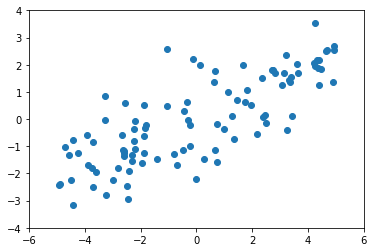

In [49]:
# For data set # 1:

# step 1
X_2d_centered = X_2d - np.mean(X_2d, axis=0)
plt.scatter(X_2d_centered[:,0], X_2d_centered[:,1])
plt.ylim((-4,4))
plt.xlim((-6,6))
plt.show()

### We see that the data is now centered on the origin.
### Now compute the transformation

In [55]:
# Step 2.
Cov = np.dot(np.transpose(X_2d_centered), X_2d_centered)
print("Covariance matrix:")
print(Cov)

#Step 3,4
Eigvals, W = np.linalg.eig(Cov)
print("\nEigenvalues:")
print(Eigvals)
print("\nEigenvectors (columns)")
print(W)
print("\nCheck that eigenvectors are orthogonal (<w1,w2>=0):")
print(np.dot(W[:,0],W[:,1]))

Covariance matrix:
[[871.15196633 369.3509381 ]
 [369.3509381  253.0717883 ]]

Eigenvalues:
[1043.69872524   80.52502939]

Eigenvectors (columns)
[[ 0.90601105 -0.42325402]
 [ 0.42325402  0.90601105]]

Check that eigenvectors are orthogonal (<w1,w2>=0):
0.0


### Let's plot the eigenvectors in comparison to the data

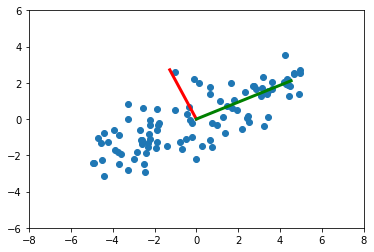

In [64]:
plt.scatter(X_2d_centered[:,0], X_2d_centered[:,1])
plt.plot([0, W[0][1]*3],[0, W[1][1]*3],'r',linewidth=3)
plt.plot([0, W[0][0]*5],[0, W[1][0]*5],'g',linewidth=3)
plt.ylim((-6,6))
plt.xlim((-8,8))
plt.show()

### Now we will apply the transformation to the data and plot the data in the new space. We flip the matrix W and corresponding eigenvalues so that they are ordered the same way as in the theory.

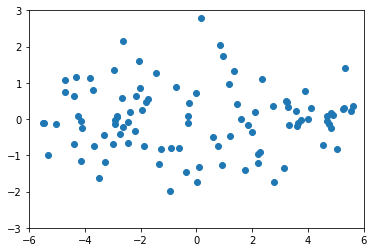

In [66]:
W = np.fliplr(W)
Eigvals = Eigvals[::-1]
X_2d_transformed = np.dot(X_2d_centered, W)
plt.scatter(X_2d_transformed[:,0], X_2d_transformed[:,1])
plt.ylim((-3,3))
plt.xlim((-8,8))
plt.show()